# Loan approval prediction using machine learning

Loan approval models can help lending institutions make more informed decisions about whether to approve or reject a loan application. By using data on past loan applicants and their repayment behavior, these models can predict the likelihood that a new applicant will default on their loan. This can help lenders minimize their risk and reduce the number of bad loans.

In addition, loan approval models can help streamline the loan application process by automating some of the decision-making. This can save time and resources for both the lender and the applicant.

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [301]:
loan=pd.read_csv("loan.csv")

In [302]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [303]:
# checking for categorical inconsistency
def print_it_all(loan):
    for col in loan.columns:
        if len(loan[col].unique()) <=5:
            print(col)
            print("null",loan[col].isnull().sum())
            print(loan[col].value_counts())
            print()
print_it_all(loan)

Gender
null 13
Male      489
Female    112
Name: Gender, dtype: int64

Married
null 3
Yes    398
No     213
Name: Married, dtype: int64

Dependents
null 15
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
null 0
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
null 32
No     500
Yes     82
Name: Self_Employed, dtype: int64

Credit_History
null 50
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Property_Area
null 0
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status
null 0
Y    422
N    192
Name: Loan_Status, dtype: int64



In [304]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [305]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [306]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [307]:
# so many null values, so data cleaning required

In [308]:
loan[loan.isnull().any(axis=1)]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [309]:
loan.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [310]:
# we may not be able to predict the loan approval rate if the amount value is missing
loan.dropna(subset=['LoanAmount'],inplace=True)

In [311]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [312]:
# normaly distributed

In [313]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

# data cleaning

In [314]:
loan.Gender.fillna(loan.Gender.mode()[0],inplace=True)
loan.Married.fillna(loan.Married.mode()[0],inplace=True)
loan.Dependents.fillna(loan.Dependents.mode()[0],inplace=True)
loan.Self_Employed.fillna(loan.Self_Employed.mode()[0],inplace=True)
loan.Loan_Amount_Term.fillna(loan.Loan_Amount_Term.mode()[0],inplace=True)
loan.Credit_History.fillna(loan.Credit_History.mode()[0],inplace=True)

In [315]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [316]:
loan.corr()

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_7552\2299969654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.113695,0.570909,-0.048588,-0.023219
CoapplicantIncome,-0.113695,1.000000,0.188619,-0.059346,0.008944
LoanAmount,0.570909,0.188619,1.000000,0.036981,-0.001463
Loan_Amount_Term,-0.048588,-0.059346,0.036981,1.000000,0.001359
Credit_History,-0.023219,0.008944,-0.001463,0.001359,1.000000


In [317]:
loan['Applicant_log_income']=np.log(loan['ApplicantIncome'])

# Data visualization

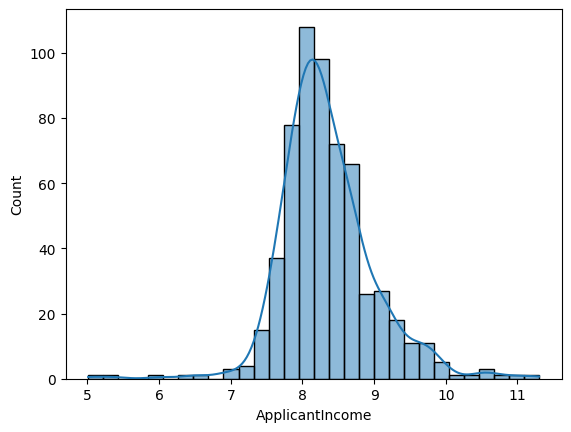

In [318]:
sns.histplot(np.log(loan['ApplicantIncome']),kde=True, bins=30)
plt.show()



c:\Users\THE_DE_V_IL\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


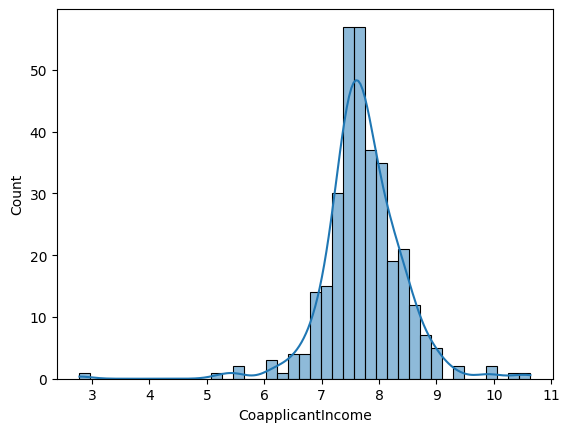

In [319]:

sns.histplot(np.log(loan['CoapplicantIncome']),kde=True)
plt.show()


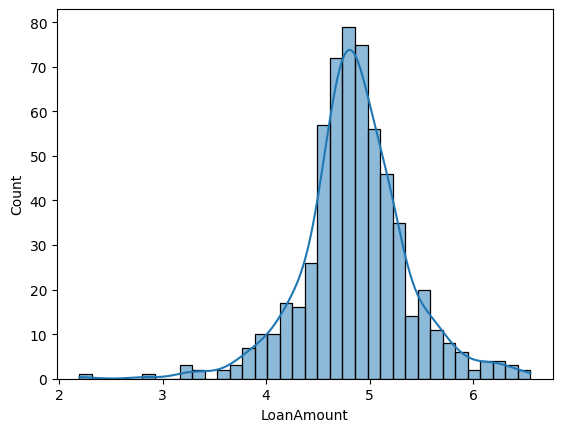

In [320]:
sns.histplot(np.log(loan['LoanAmount']),kde=True)
plt.show()


In [321]:
# data is normaly distributed

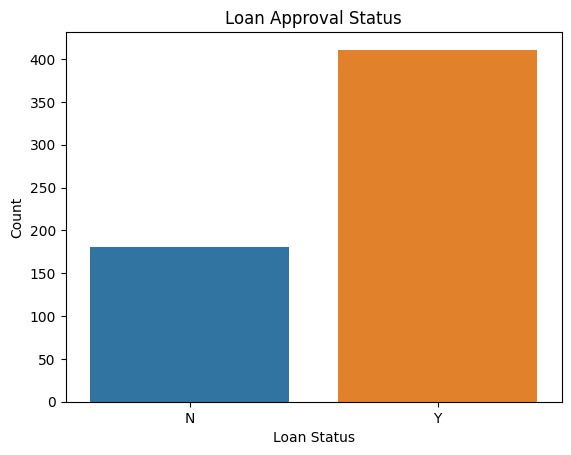

In [322]:
sns.countplot(x='Loan_Status', data=loan)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

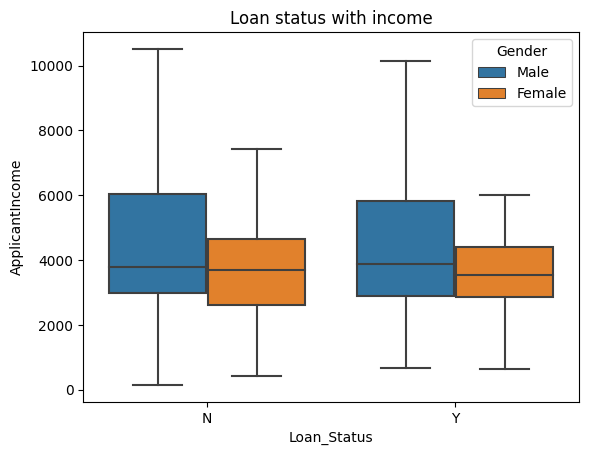

In [323]:
sns.boxplot( x='Loan_Status',y='ApplicantIncome',data=loan,sym='',hue='Gender')
plt.title('Loan status with income')
plt.show()

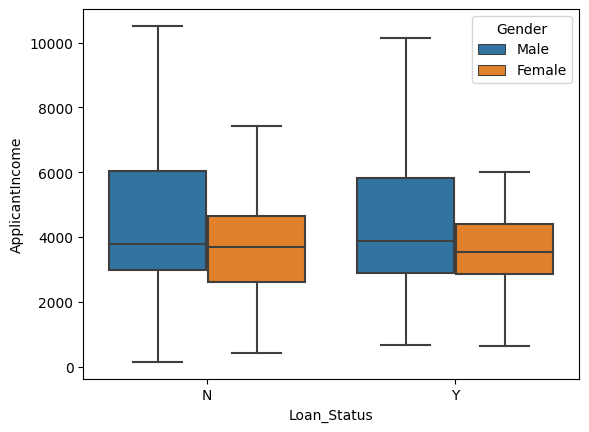

In [324]:
sns.boxplot( x='Loan_Status',y='ApplicantIncome',data=loan,sym='',hue='Gender')
plt.show()

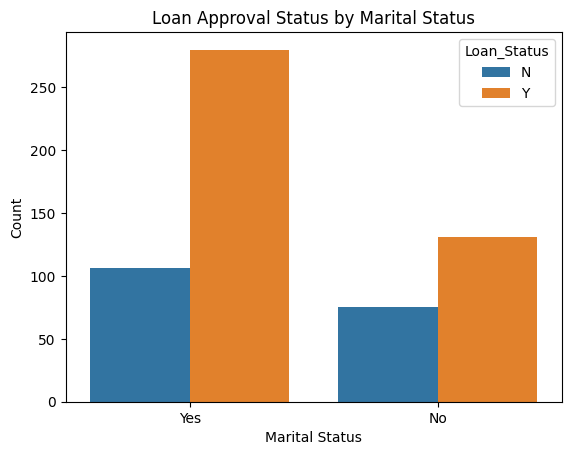

In [325]:
sns.countplot(x='Married', hue='Loan_Status', data=loan)
plt.title('Loan Approval Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


In [326]:
# Married people have almost twice aapproval rate

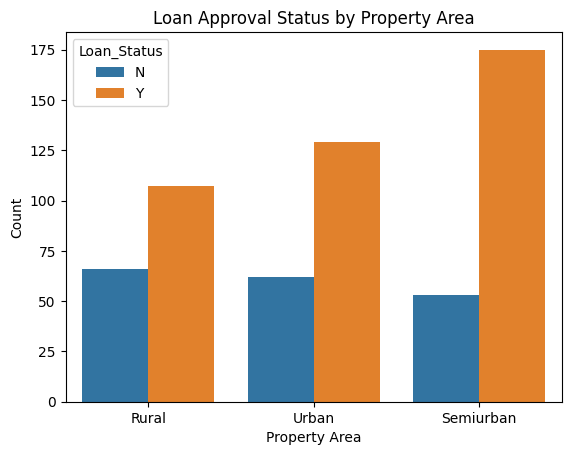

In [327]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan)
plt.title('Loan Approval Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


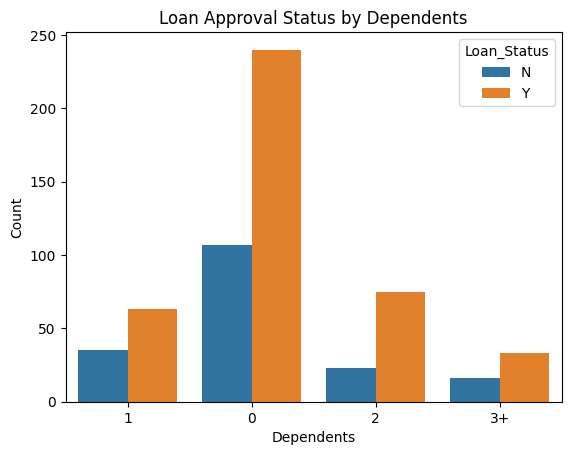

In [328]:
sns.countplot(x='Dependents', hue='Loan_Status', data=loan)
plt.title('Loan Approval Status by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()


In [329]:
# Most peopple who applied for a loan have no dependents

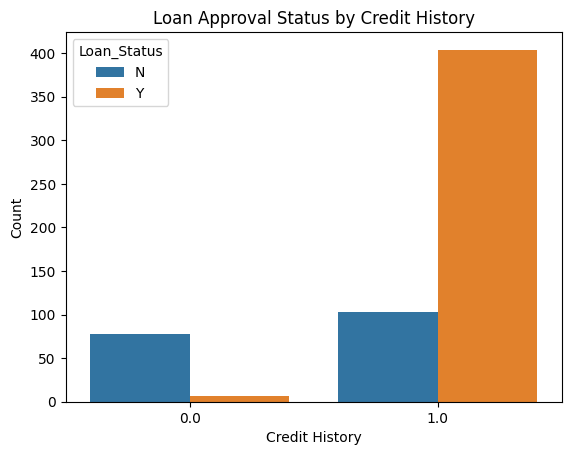

In [330]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan)
plt.title('Loan Approval Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()


In [331]:
# credit history is important for approval

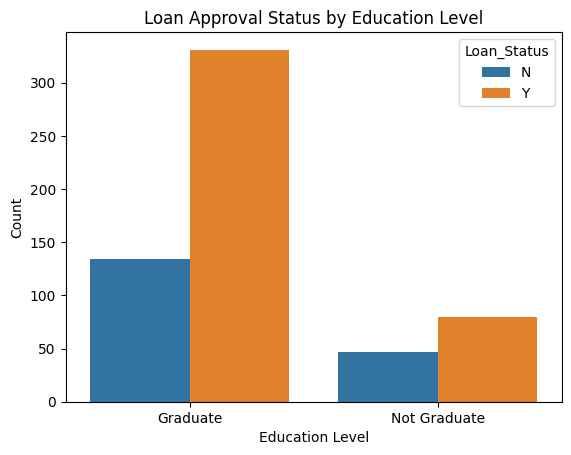

In [332]:
sns.countplot(x='Education', hue='Loan_Status', data=loan)
plt.title('Loan Approval Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


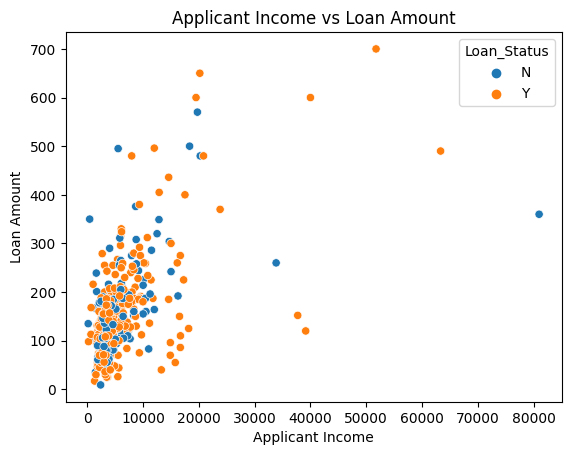

In [333]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# feature_engineering

Feature engineering is the process of creating new features or modifying existing features in a dataset to improve the performance of machine learning models. The goal of feature engineering is to transform raw data into a set of features that can be easily understood and analyzed by machine learning algorithms.

In [334]:
print_it_all(loan)

Gender
null 0
Male      483
Female    109
Name: Gender, dtype: int64

Married
null 0
Yes    386
No     206
Name: Married, dtype: int64

Dependents
null 0
0     347
1      98
2      98
3+     49
Name: Dependents, dtype: int64

Education
null 0
Graduate        465
Not Graduate    127
Name: Education, dtype: int64

Self_Employed
null 0
No     513
Yes     79
Name: Self_Employed, dtype: int64

Credit_History
null 0
1.0    507
0.0     85
Name: Credit_History, dtype: int64

Property_Area
null 0
Semiurban    228
Urban        191
Rural        173
Name: Property_Area, dtype: int64

Loan_Status
null 0
Y    411
N    181
Name: Loan_Status, dtype: int64



In [335]:
loan['Loan_Amount_Term'].value_counts()

360.0    507
180.0     42
480.0     15
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [336]:
# Create loan term bins
bins = [0, 180, 360, float('inf')]
labels = ['short_term', 'medium_term', 'long_term']

Loan_Amount_Term_Binned= pd.cut(loan['Loan_Amount_Term'], bins=bins, labels=labels)
loan['Loan_Amount_year'] = Loan_Amount_Term_Binned.cat.codes


# encoding

converting categorical data into numerical form that can be used by machine learning algorithms to improve the accuracy of their predictions. Machine learning algorithms typically work with numerical data, and they cannot process categorical data in their raw form. Therefore, we need to convert categorical data into numerical data using encoding techniques.

In [337]:
loan['Gender']=loan['Gender'].replace({'Male':0,'Female':1})
loan['Married']=loan['Married'].replace({'No':0,'Yes':1})
loan['Education']=loan['Education'].replace({'Not Graduate':0,'Graduate':1})
loan['Self_Employed']=loan['Self_Employed'].replace({'No':0,'Yes':1})
loan['Dependents']=loan['Dependents'].replace({'3+':4})
loan['Loan_Status']=loan['Loan_Status'].replace({'Y':0,'N':1})

In [338]:
property_hot=pd.get_dummies(loan['Property_Area'],prefix='area')
loan=pd.concat([loan,property_hot],axis=1)
loan.drop('Property_Area',axis=1,inplace=True)

In [339]:
loan['total_income']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['debt_ratio']=loan['LoanAmount']/loan['total_income']


In [340]:
from sklearn.preprocessing import LabelEncoder

In [341]:
loan['loan_class']=pd.cut(loan['LoanAmount'],bins=3,labels=['Low', 'Medium', 'High'])
loan['loan_class']=LabelEncoder().fit_transform(loan['loan_class'])

In [342]:
loan['Total_Income_Class'] = pd.cut(loan['total_income'], 
                                     bins=3, 
                                     labels=['Low', 'Medium', 'High'])
loan['Total_Income_Class'] = LabelEncoder().fit_transform(loan['Total_Income_Class'])


In [343]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Applicant_log_income,Loan_Amount_year,area_Rural,area_Semiurban,area_Urban,total_income,debt_ratio,loan_class,Total_Income_Class
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,...,1,8.430109,1,1,0,0,6091.0,0.021015,1,1
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,...,0,8.006368,1,0,0,1,3000.0,0.022000,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,...,0,7.856707,1,0,0,1,4941.0,0.024287,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,...,0,8.699515,1,0,0,1,6000.0,0.023500,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,...,0,8.597297,1,0,0,1,9613.0,0.027775,2,1


In [344]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Applicant_log_income', 'Loan_Amount_year', 'area_Rural',
       'area_Semiurban', 'area_Urban', 'total_income', 'debt_ratio',
       'loan_class', 'Total_Income_Class'],
      dtype='object')

#  predictive modelling

In [345]:
from sklearn.model_selection import train_test_split
X = loan[['Gender','Married', 'Education', 'LoanAmount', 'Credit_History','area_Semiurban', 
               'ApplicantIncome', 'debt_ratio','area_Rural']]
y = loan['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [346]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,recall_score, f1_score, roc_curve, roc_auc_score


rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
rfc.score(X_test,y_test)
y_pred=rfc.predict(X_test)

In [347]:

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

# Calculate the precision score
precision = precision_score(y_test, y_pred)
print("Precision score:", precision)

# Calculate the recall score
recall = recall_score(y_test, y_pred)
print("Recall score:", recall)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the ROC curve and AUC score
y_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC score:", auc)





Accuracy score: 0.8426966292134831
Precision score: 0.8372093023255814
Recall score: 0.631578947368421
F1-score: 0.72
AUC score: 0.8157169783964042


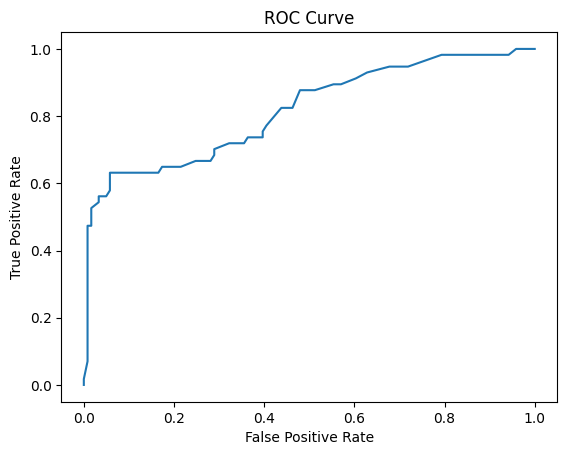

In [348]:
# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [349]:
confusion_matrix(y_test, y_pred)

array([[114,   7],
       [ 21,  36]], dtype=int64)

In [350]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       121
           1       0.84      0.63      0.72        57

    accuracy                           0.84       178
   macro avg       0.84      0.79      0.81       178
weighted avg       0.84      0.84      0.84       178



In this loan prediction analysis, a model was used to predict whether a loan would be approved or not. The model was tested on 178 samples and correctly predicted the outcome for 84% of them. When predicting that a loan would not be approved (class 0), the model was correct 84% of the time and identified 94% of all loans that were not approved. When predicting that a loan would be approved (class 1), the model was correct 84% of the time and identified 63% of all loans that were approved.Overall, the model performed well in predicting loan approvals with an accuracy of 84%. It was particularly good at identifying loans that would not be approved (class 0), with a high recall of 94%. However, there is room for improvement in identifying loans that would be approved (class 1), as the recall for this class was 63%, if trained on larger, balanced data set we could improve the prediction.